# Correlation Plots

Data Frame 1

Created all the NA to zeros to have a numerical study of the data

In [58]:
library(readxl)
library(RColorBrewer)
library(corrplot)
#install.packages("psych")
#install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
library(psych)
library(mvtnorm) # col.norm
library(tilting) # col.norm
#install.packages('ggplot2')
library(ggplot2)
library("np") #npreg: you may need to install it
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting

In [59]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df.wb <- read_excel("../../results/df-wb.xlsx",sheet=1)
head(dfsimple)
head(df.wb)
max(dfsimple$Year)


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,NA,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,NA
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,NA,6.4,0.8,NA,0.3


Country,Year.y,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Angola,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7
Armenia,2018,YR2018,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4
Azerbaijan,2018,YR2018,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6
Bangladesh,2018,YR2018,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3


[1] 2019

In [60]:
dfsimple[is.na(dfsimple)] <- 0 # Convert all your NA to 0 to keep numeric values
head(dfsimple ,7)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3
Benin,2018,DHS,71.7,5.1,4.2,13.0,28.9,4.4,0.3,...,7.3,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3


imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,1.5,4.4,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,14.1,0.2,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,9.7,4.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,1.5,0.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.5,0.7,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.0,0.1,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3
71.7,5.1,4.2,13.0,28.9,4.4,0.3,0.4,0.2,0.3,...,7.3,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3


,imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
imws,1.00,0.48,0.09,-0.13,0.06,-0.16,-0.10,0.05,-0.01,-0.02,...,-0.30,0.56,-0.46,-0.48,-0.06,-0.09,-0.01,0.47,-0.14,-0.22
phom,0.48,1.00,-0.02,-0.35,-0.37,-0.20,-0.21,-0.11,0.13,-0.15,...,-0.43,0.50,-0.63,-0.45,-0.15,-0.14,-0.21,0.61,-0.12,-0.45
pipy,0.09,-0.02,1.00,0.29,-0.28,-0.24,-0.10,-0.08,-0.06,-0.05,...,-0.13,0.22,-0.12,-0.17,0.09,0.08,-0.26,0.16,0.02,-0.14
ptap,-0.13,-0.35,0.29,1.00,-0.10,0.02,0.24,-0.23,-0.11,-0.17,...,0.49,-0.38,0.55,0.45,-0.18,0.13,-0.25,-0.29,-0.27,0.19
bore,0.06,-0.37,-0.28,-0.10,1.00,0.07,-0.17,-0.13,-0.20,-0.06,...,0.16,-0.18,0.35,0.08,0.23,0.21,0.30,-0.35,-0.15,0.40
pwel,-0.16,-0.20,-0.24,0.02,0.07,1.00,-0.06,-0.16,0.00,0.16,...,0.15,-0.46,0.19,0.19,0.07,0.14,0.04,-0.18,-0.14,0.01
pspr,-0.10,-0.21,-0.10,0.24,-0.17,-0.06,1.00,-0.08,-0.07,-0.02,...,0.40,-0.25,0.29,0.36,-0.16,-0.17,-0.15,-0.20,-0.11,0.17
rain,0.05,-0.11,-0.08,-0.23,-0.13,-0.16,-0.08,1.00,-0.07,0.00,...,-0.20,0.08,-0.30,-0.19,0.31,-0.07,0.35,-0.05,0.75,-0.16
truc,-0.01,0.13,-0.06,-0.11,-0.20,0.00,-0.07,-0.07,1.00,0.09,...,0.04,0.20,-0.22,0.08,-0.19,-0.07,-0.16,0.28,-0.07,-0.27
ctan,-0.02,-0.15,-0.05,-0.17,-0.06,0.16,-0.02,0.00,0.09,1.00,...,-0.10,0.05,-0.04,-0.08,-0.15,0.07,0.14,0.00,0.01,0.06


,imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
imws,1.00,0.48,0.09,-0.13,0.06,-0.16,-0.10,0.05,-0.01,-0.02,...,-0.30,0.56,-0.46,-0.48,-0.06,-0.09,-0.01,0.47,-0.14,-0.22
phom,0.48,1.00,-0.02,-0.35,-0.37,-0.20,-0.21,-0.11,0.13,-0.15,...,-0.43,0.50,-0.63,-0.45,-0.15,-0.14,-0.21,0.61,-0.12,-0.45
pipy,0.09,-0.02,1.00,0.29,-0.28,-0.24,-0.10,-0.08,-0.06,-0.05,...,-0.13,0.22,-0.12,-0.17,0.09,0.08,-0.26,0.16,0.02,-0.14
ptap,-0.13,-0.35,0.29,1.00,-0.10,0.02,0.24,-0.23,-0.11,-0.17,...,0.49,-0.38,0.55,0.45,-0.18,0.13,-0.25,-0.29,-0.27,0.19
bore,0.06,-0.37,-0.28,-0.10,1.00,0.07,-0.17,-0.13,-0.20,-0.06,...,0.16,-0.18,0.35,0.08,0.23,0.21,0.30,-0.35,-0.15,0.40
pwel,-0.16,-0.20,-0.24,0.02,0.07,1.00,-0.06,-0.16,0.00,0.16,...,0.15,-0.46,0.19,0.19,0.07,0.14,0.04,-0.18,-0.14,0.01


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3
Benin,2018,DHS,71.7,5.1,4.2,13.0,28.9,4.4,0.3,...,7.3,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3
Bolivia,2008,DHS,87.3,24.6,54.1,5.3,0.0,1.7,0.0,...,0.0,88.0,11.2,0.7,36.6,0.0,6.5,15.6,0.0,0.0
Burkina Faso,2018,MIS,80.9,2.6,9.6,18.4,40.6,9.0,0.2,...,28.5,17.1,49.8,32.6,82.0,38.6,58.2,3.0,0.0,0.2


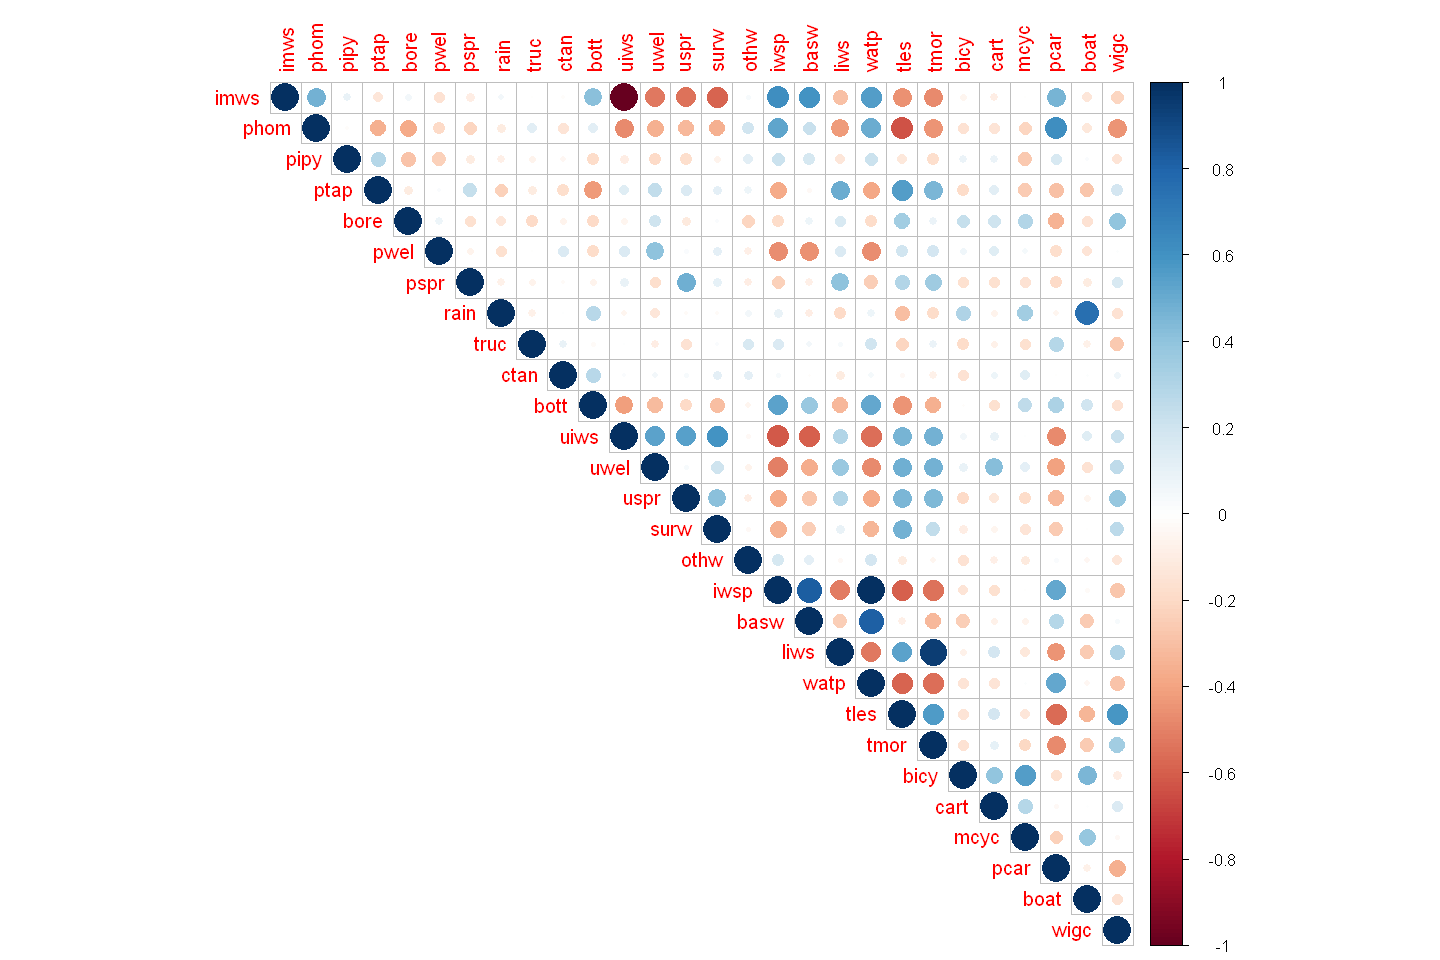

In [61]:
my_data <- dfsimple[, c(4:31)]
head(my_data, 7)
res <- cor(my_data)
round(res, 2)
M<-cor(my_data)
head(round(M,2))
corrplot(M, type="upper", tl.cex = 1)

as.data.frame(dfsimple)

# Advanced Correlation Graphs

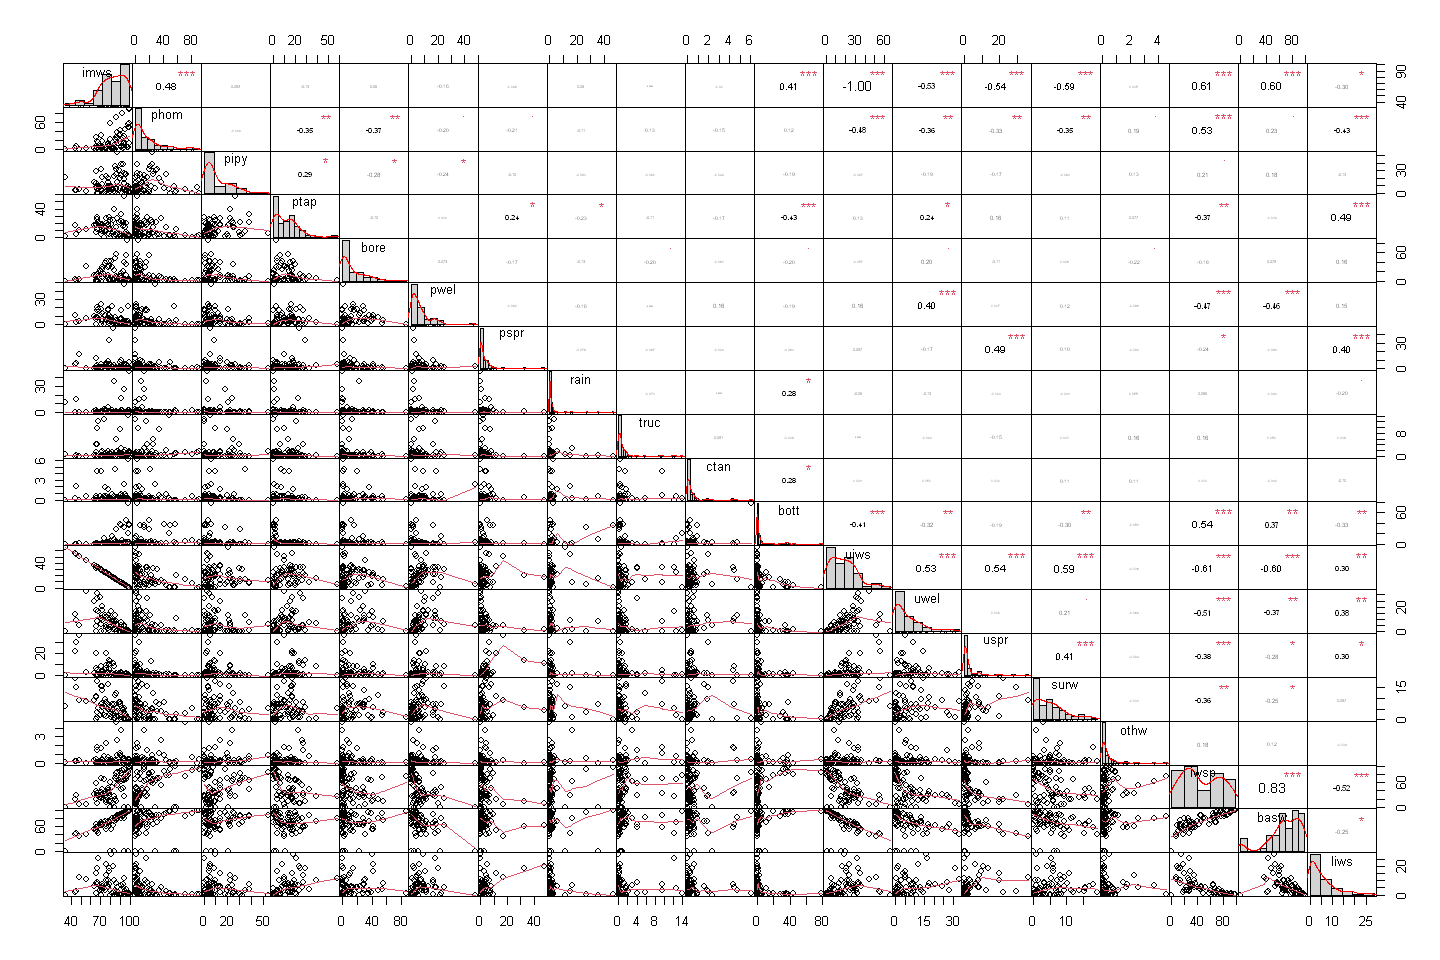

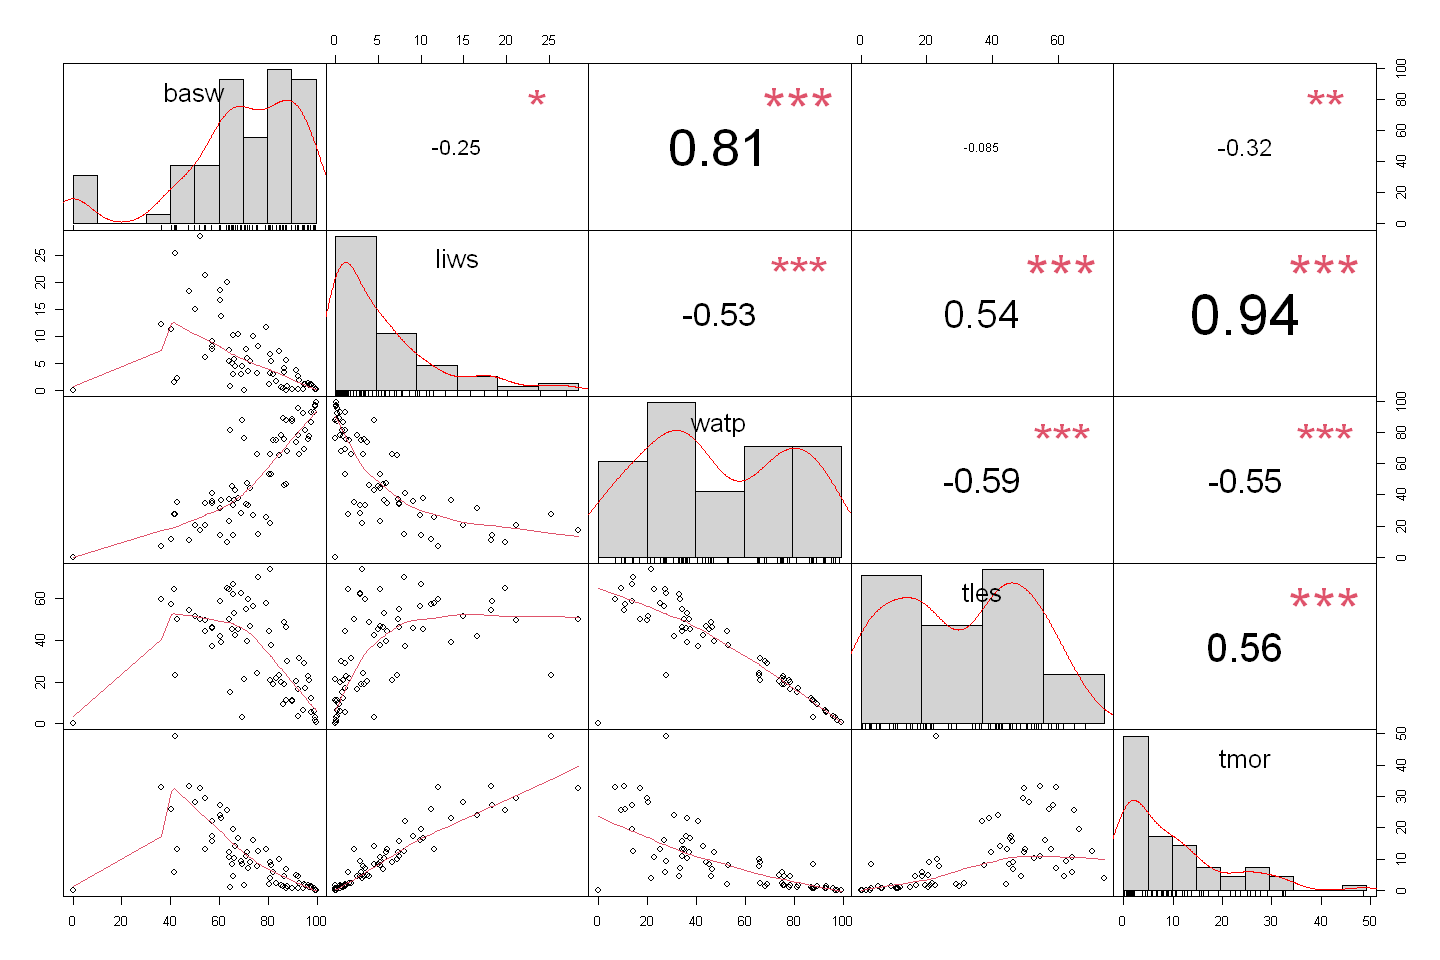

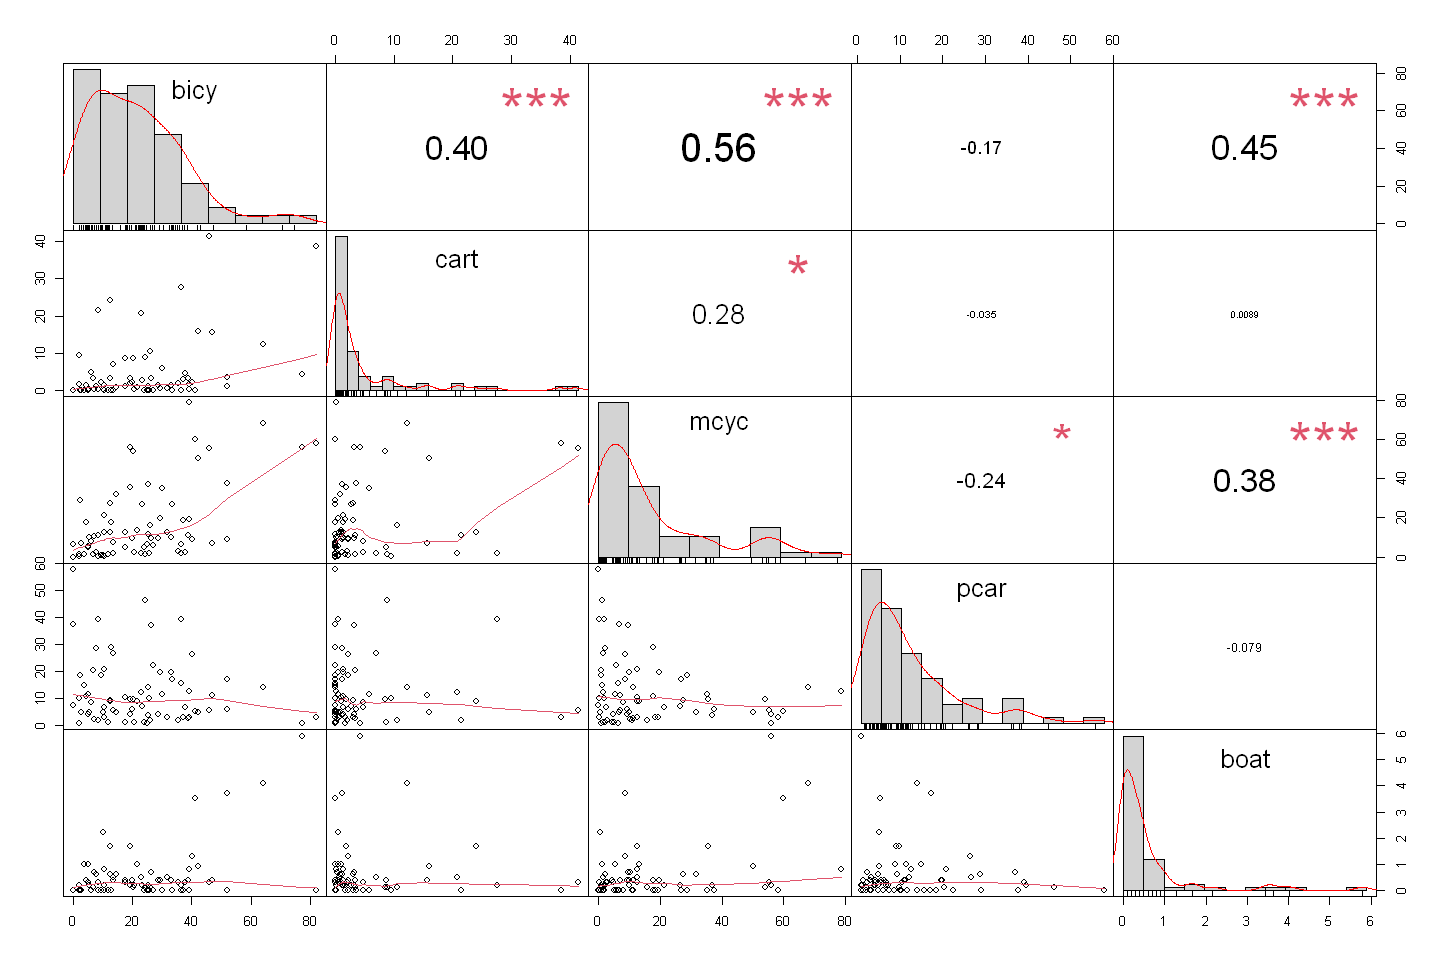

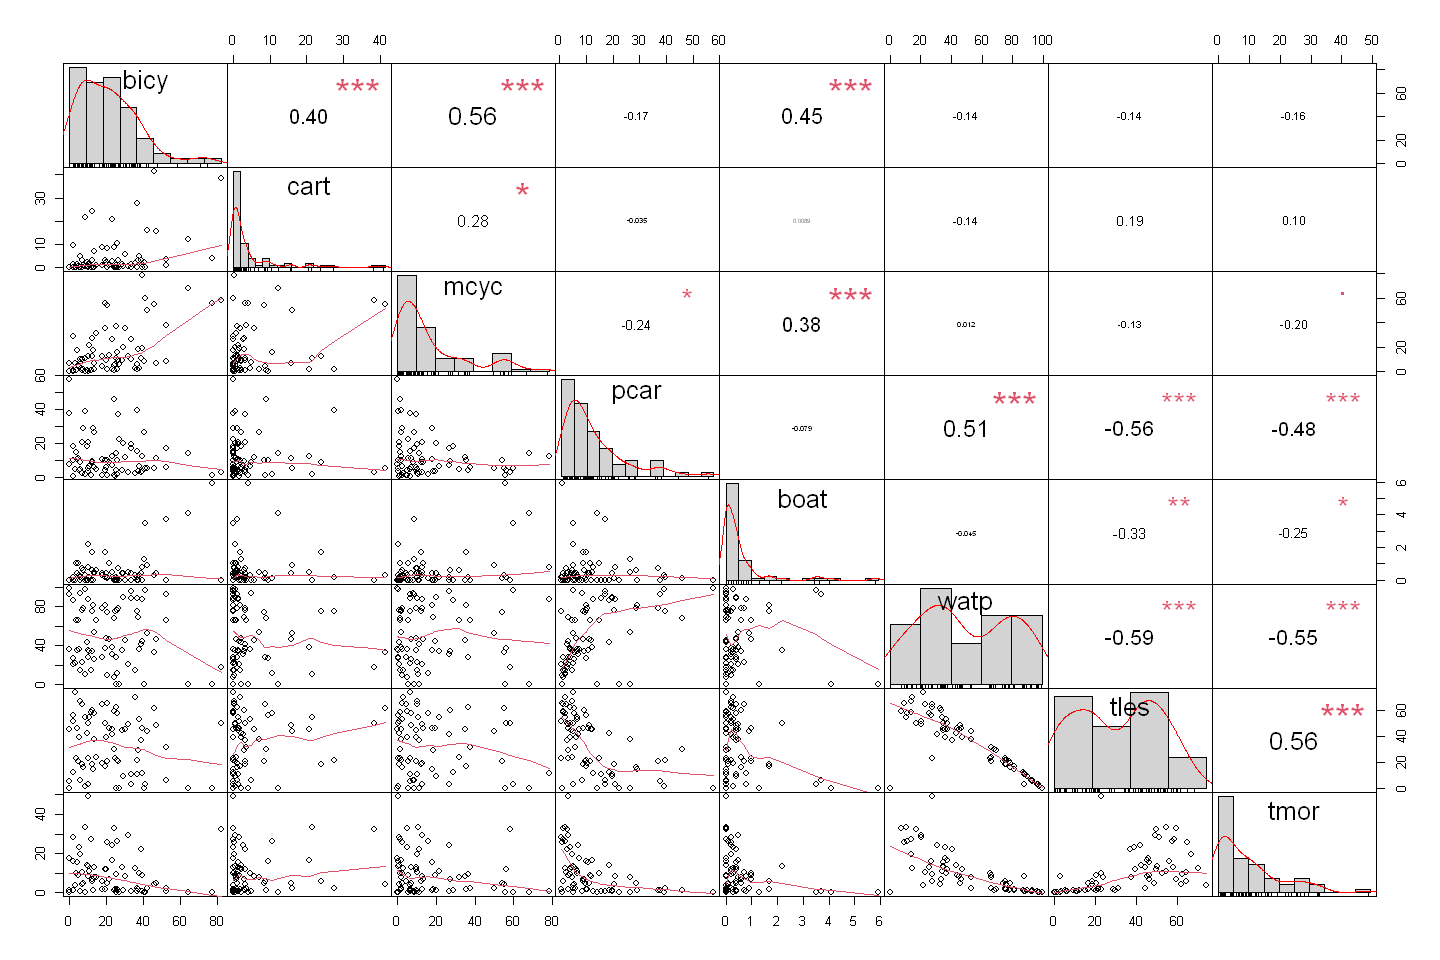

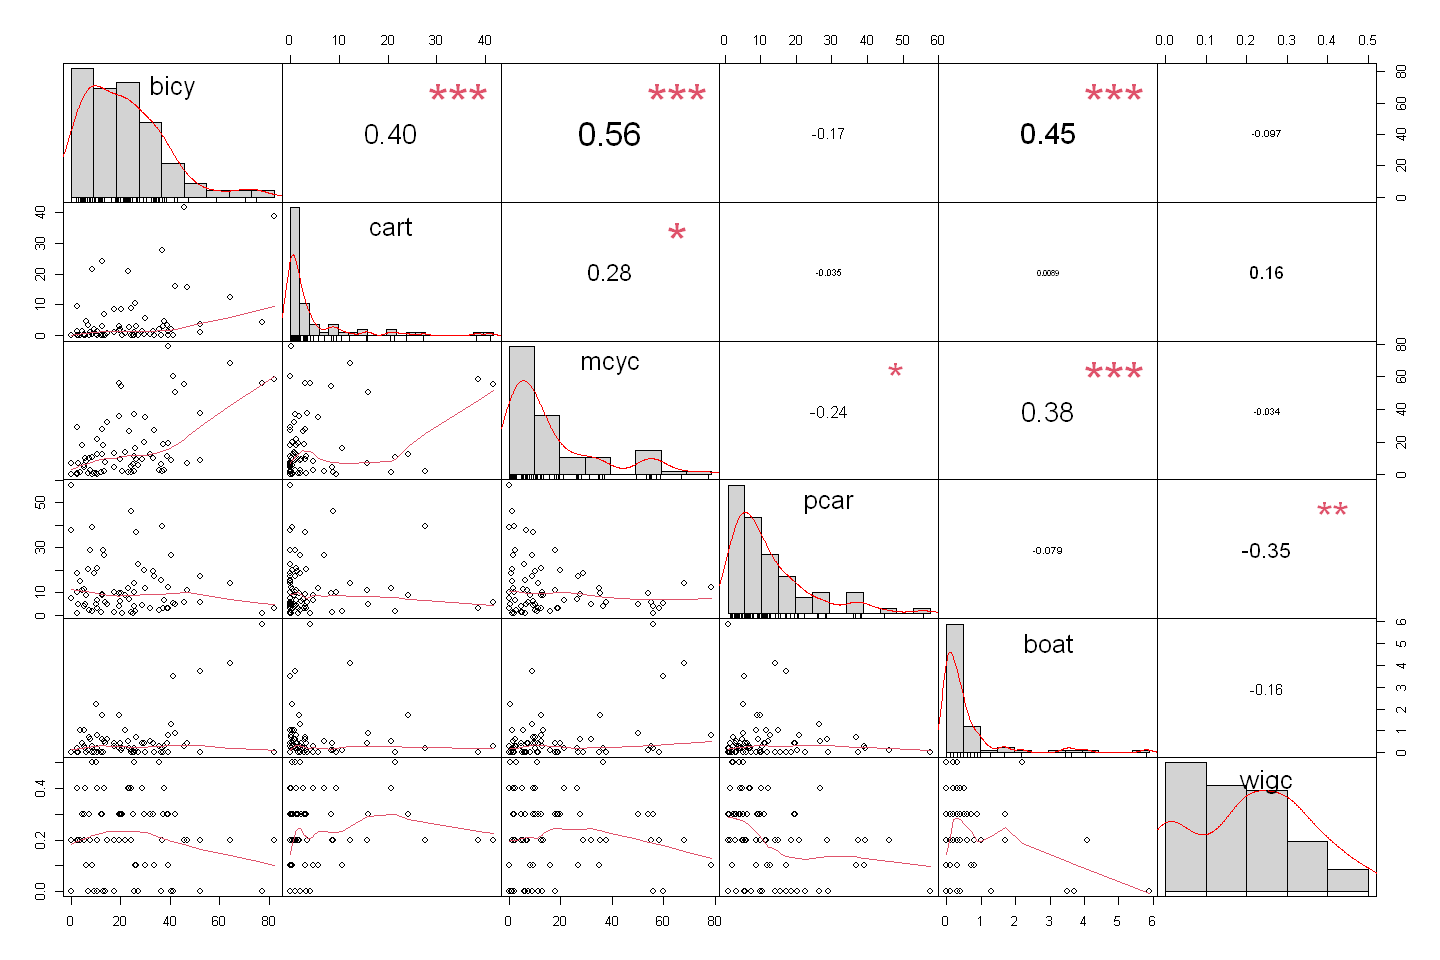

In [62]:
#sample for water sources
my_data_acc <- dfsimple[, c(4:22)]
chart.Correlation(my_data_acc, histogram=TRUE, pch=19 , tl.cex = .7 )
#sample for location/premise
my_data_loc <- dfsimple[, c(21:25)]
chart.Correlation(my_data_loc, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation
my_data_move <- dfsimple[, c(26:30)]
chart.Correlation(my_data_move, histogram=TRUE, pch=19 , tl.cex = .5 )
#Comparison with Transportation and Time it gets to the source of water
my_data_time <- dfsimple[, c(26:30,23:25)]
chart.Correlation(my_data_time, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation compared with wealth
my_data_money <- dfsimple[, c(26:31)]
chart.Correlation(my_data_money, histogram=TRUE, pch=19 , tl.cex = .5 )


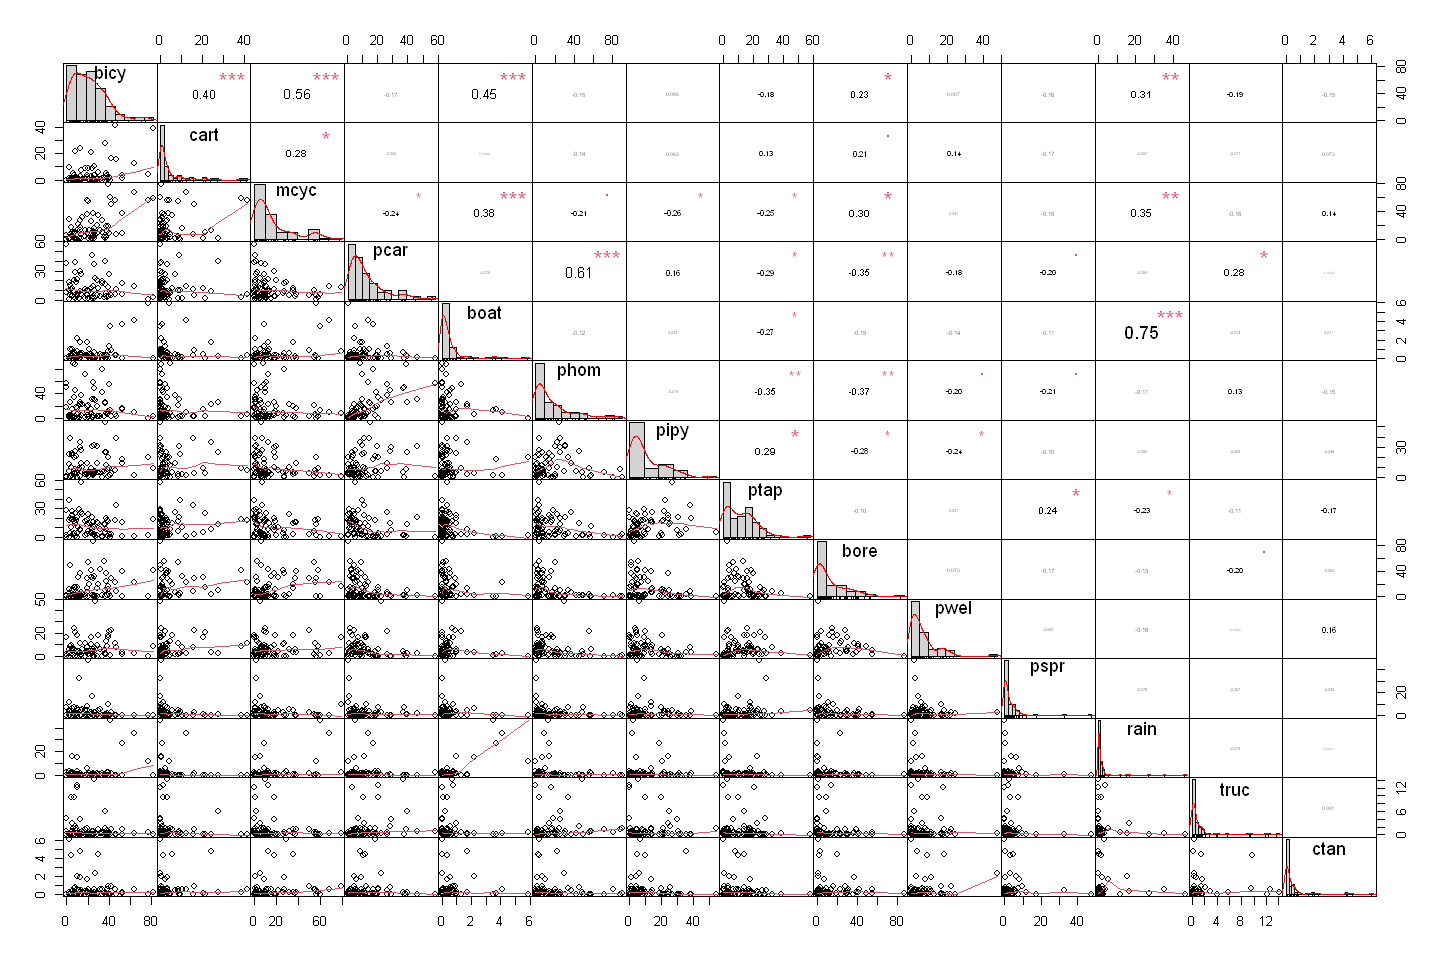

In [63]:
#sample for transportation, water retrieving part 1 comparison
my_data_water1 <- dfsimple[, c(26:30, 5:13)]
chart.Correlation(my_data_water1, histogram=TRUE, pch=19 , tl.cex = .5 )

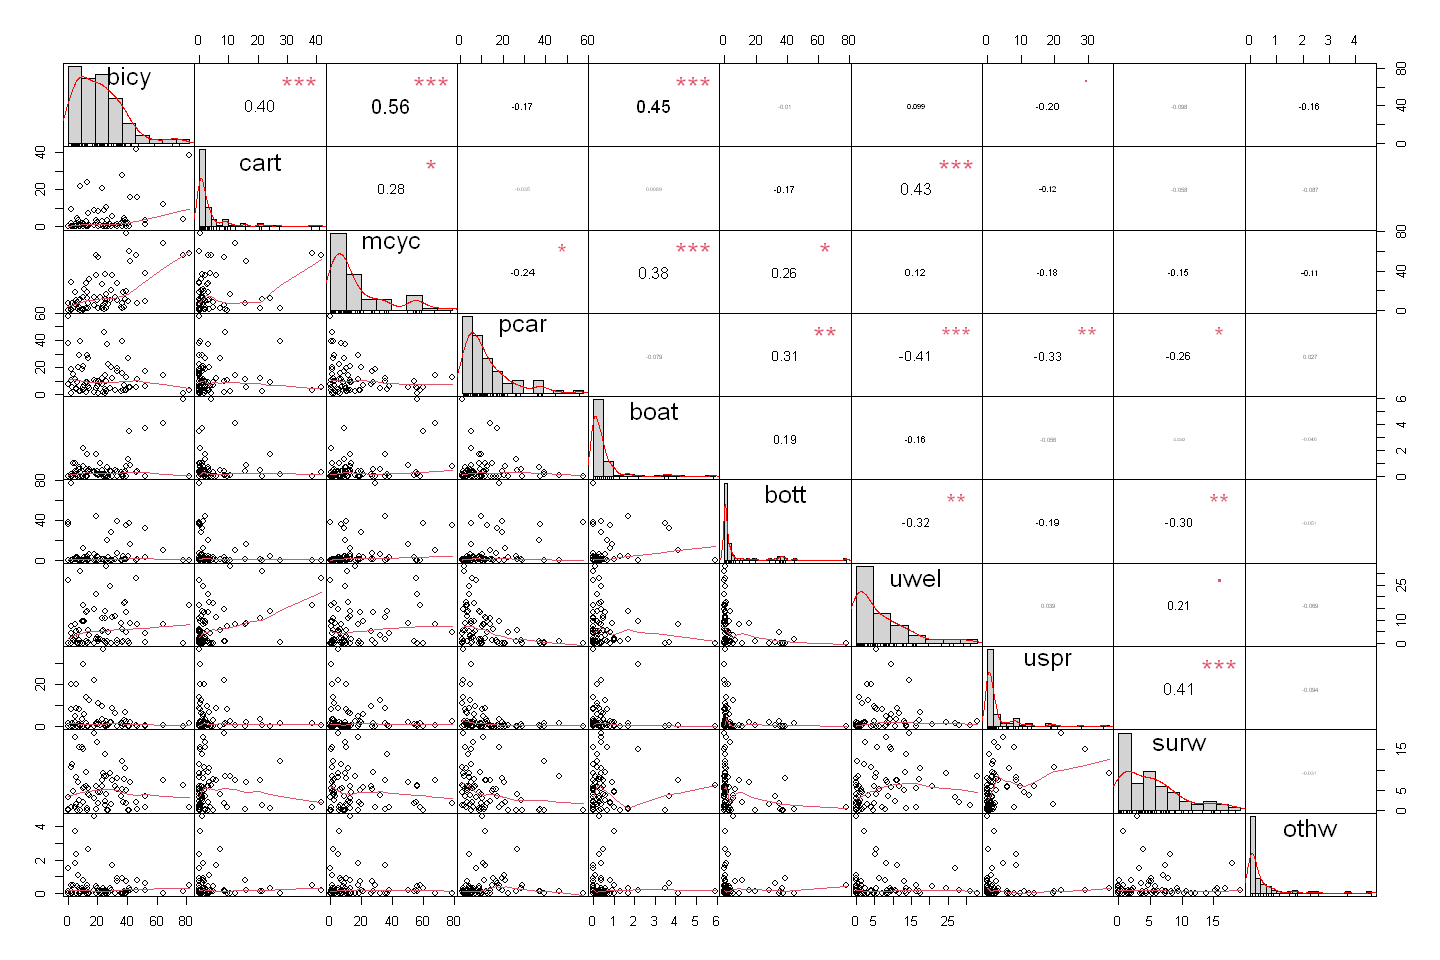

In [64]:
#sample for transportation, water retrieving part 2 comparison
my_data_water2 <- dfsimple[, c(26:30, 14, 16:19)]
chart.Correlation(my_data_water2, histogram=TRUE, pch=19 , tl.cex = .5 )

   Country              Year.y      Time Code              cgdp          
 Length:73          Min.   :2018   Length:73          Min.   :0.000e+00  
 Class :character   1st Qu.:2018   Class :character   1st Qu.:1.091e+10  
 Mode  :character   Median :2018   Mode  :character   Median :2.349e+10  
                    Mean   :2018                      Mean   :1.237e+11  
                    3rd Qu.:2018                      3rd Qu.:7.617e+10  
                    Max.   :2018                      Max.   :2.713e+12  
      tpop                upop            popd              land        
 Min.   :0.000e+00   Min.   : 0.00   Min.   :   0.00   Min.   :    300  
 1st Qu.:6.323e+06   1st Qu.:29.36   1st Qu.:  37.51   1st Qu.:  94280  
 Median :1.585e+07   Median :42.63   Median :  82.24   Median : 273600  
 Mean   :5.239e+07   Mean   :44.43   Mean   : 152.64   Mean   : 496093  
 3rd Qu.:3.717e+07   3rd Qu.:56.37   3rd Qu.: 147.75   3rd Qu.: 770880  
 Max.   :1.353e+09   Max.   :90.98   Max.   

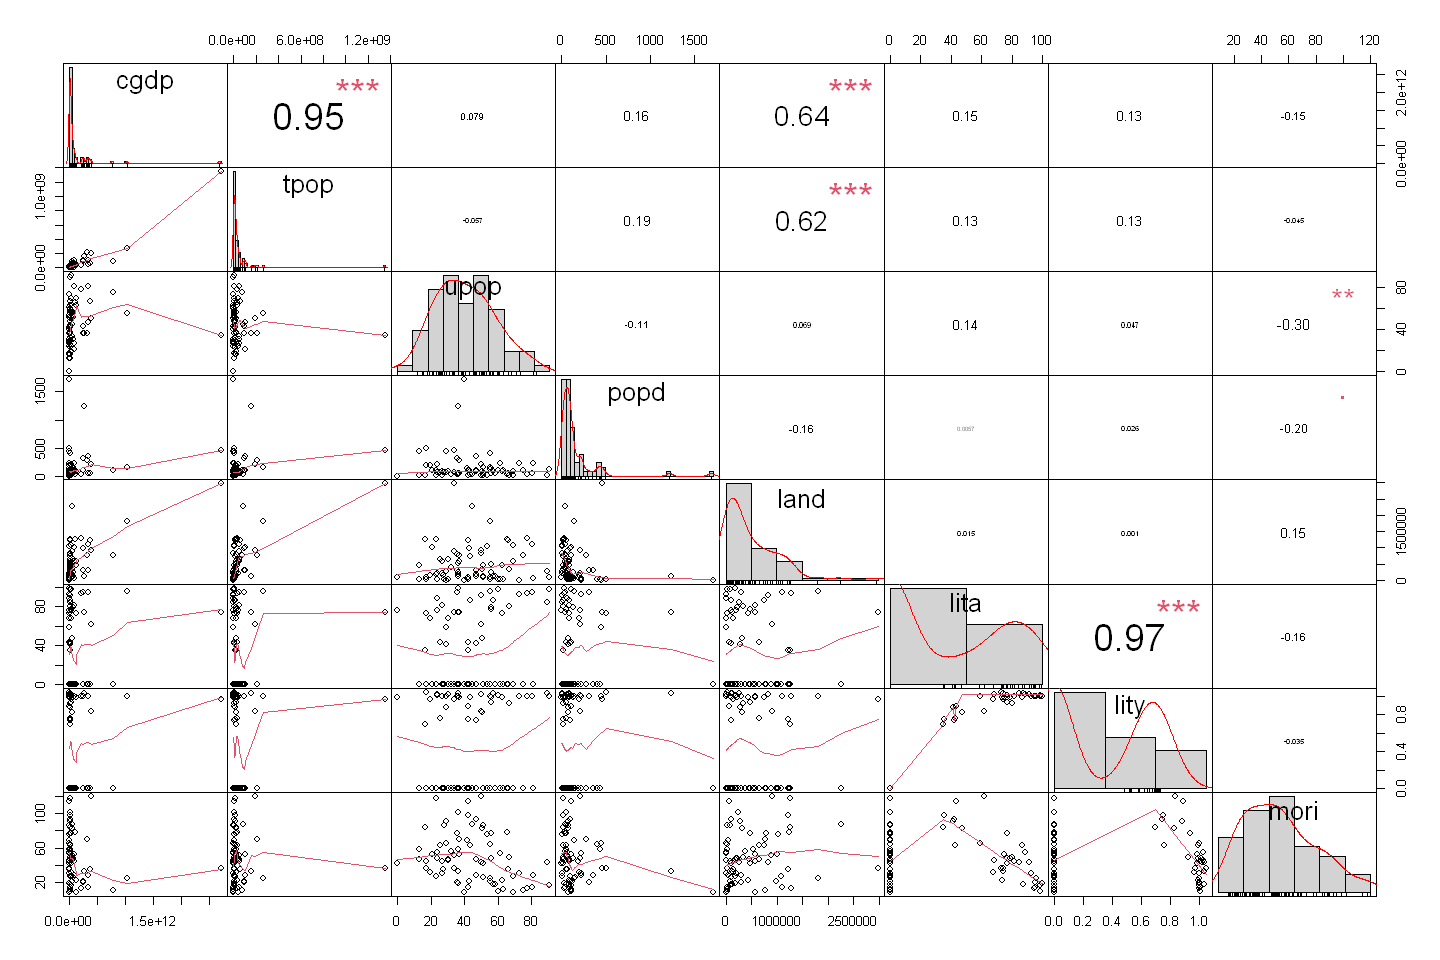

In [66]:
#Exploratory Data from World Bank 
summary(df.wb)
chart.Correlation(df.wb[, 4:11], histogram=TRUE, pch=19 , tl.cex = .7 )

# Principal Component Analysis

In [ ]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(my_data, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
apply(my_data, 2, mean)
apply(my_data, 2, var)
hpca_cor <- prcomp(my_data, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

Loading Bars for 12 Dimensions# 

In [ ]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions") 
# 8 principal component vector
PC_contr <- eigenvectors[,c("PC8")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr8 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr8, main="Contribution to the 8th component",xlab="Original Dimensions") 
# 9 principal component vector
PC_contr <- eigenvectors[,c("PC9")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr9 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr9, main="Contribution to the 9th component",xlab="Original Dimensions") 
# 10 principal component vector
PC_contr <- eigenvectors[,c("PC10")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr10 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr10, main="Contribution to the 10th component",xlab="Original Dimensions") 
# 11 principal component vector
PC_contr <- eigenvectors[,c("PC11")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr11 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr11, main="Contribution to the 11th component",xlab="Original Dimensions") 
# 12 principal component vector
PC_contr <- eigenvectors[,c("PC12")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr12 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr12, main="Contribution to the 12th component",xlab="Original Dimensions")
scatter.smooth(PC_contr1,PC_contr2)

# Basics PCA with Color Visualization

In [ ]:
res.pca <- PCA(my_data, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
eig.val
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 36)
# Cos2: quality on the factor map
head(var$cos2,36)
# Contributions to the principal components
head(var$contrib, 36)
#For all the 36 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)